# Data Compression and Shannon Theory

This tour reproduces the figures for my introduction article 
on Shannon theory of data compression.

First add the toolbox additional functions into the path.

In [1]:
warning off; addpath('toolbox'); warning on;

#Image loading and quantizing

Set parameters values.

In [2]:
name = 'hibiscus'; % image name
q = 4; % quantization step
qmax = q;
n = 256; % image size

Useful helper functions.

In [3]:
normalize = @(x)x/sum(x(:));
myhist = @(x,y)normalize(hist(x,y));
Quant = @(x,q)min(floor( rescale(x)*q  ), q-1);
Entropy = @(h)-sum(h.*log2(max(h,1e-20)));
myaxis = @(x,h)axis([min(x)-1/2 max(x)+1/2 0 max(h)*1.02]);

Load the initial image $x_0$ and quantize it to $q$ values to obtain $x$ with pixel values in $\{0,\ldots,q-1\}$.

In [4]:
x0 = load_image(name, n);
x0 = rescale(sum(x0,3));
x = Quant(x0,q);

Display the images $x_0$ and $x$.

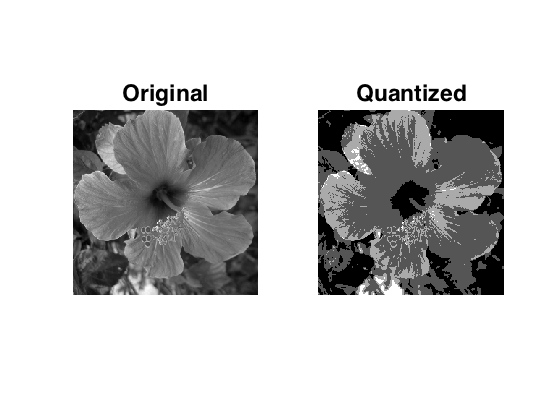

In [5]:
imageplot({x0,x}, {'Original', 'Quantized'});

# Huffman coding of pixel values

Compute the empirical distributions (histogram) of the pixels.

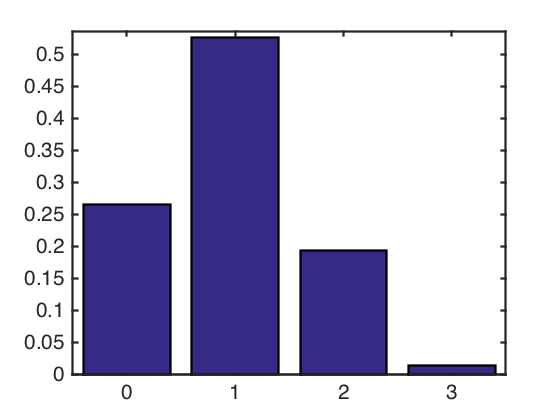

In [6]:
hx = myhist(x(:),0:q-1);
clf; 
bar(0:q-1, hx); axis tight;
myaxis(0:qmax-1, hx);

Run Huffman's algorithm to compute the tree storing in its leaves
the codewords of an optimal coding scheme.

In [7]:
Tx = compute_hufftree(hx);

Display this tree, with the codewords in the leaves.

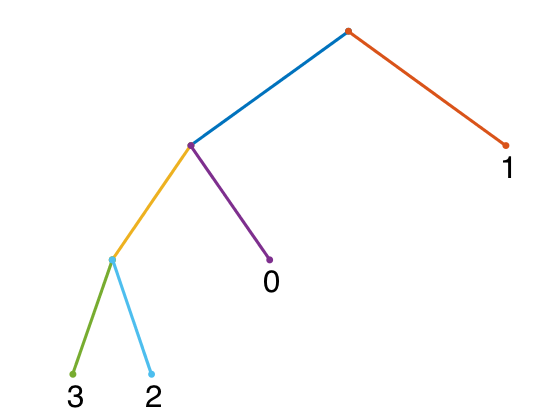

In [8]:
clf; plot_hufftree(Tx, -1); 

Generate the list of all the codewords.

In [9]:
[Cx,Lx] = huffman_gencode(Tx);

Perform the actual coding of the values in $x$.

In [10]:
bx = perform_huffcoding(x(:)+1,Tx,+1);

Compare the length of the stream with the entropy bound, to check its tightness. 

In [11]:
Ex = Entropy(hx);
Ex1 = sum(hx(:).*Lx);
Ex2 = length(bx)/length(x(:)); % should be equal to Ex1
fprintf('Entropy=%.3f, Huffman=%.3f, log2(q)=%.3f\n', Ex, Ex1, log2(q));

Entropy=1.541, Huffman=1.681, log2(q)=2.000

This shows that the entropy is a bit smaller than the actual average number 
of bits per symbol. This is because the optimal codeword 
length predicted by Shannon's 
theory is not an integer, whereas Hufman coding can only generate 
codewords with integer length.
This can be alleviated using arithmetic coding, which is a more advancesd
coding technic. 

#Coding of pixel differences

Compute difference of consecutive pixels, $y_i=x_{i}-x_{i-1}$.

In [12]:
y = diff(x(:))+q-1;

Compute the empirical frequency (histogram) of these differences.

In [13]:
hy = myhist(y(:),0:2*q-2);

Display this histogram.

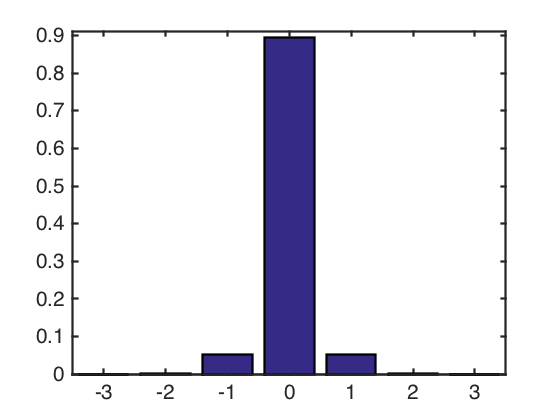

In [23]:
clf; 
bar(-(q-1):q-1, hy); axis tight;
myaxis(-(qmax-1):qmax-1, hy);

Compute the Huffman tree.

In [15]:
Ty = compute_hufftree(hy);

Display this Huffman tree.

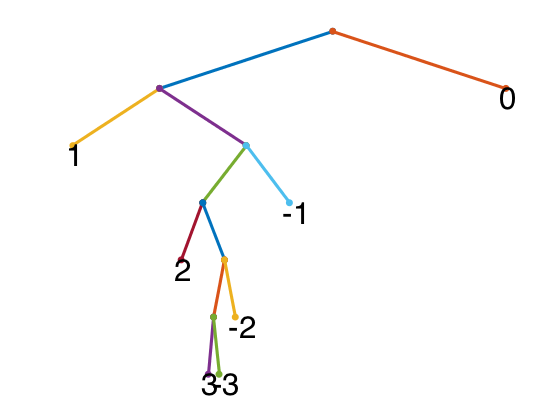

In [16]:
clf; plot_hufftree(Ty, -q); 

Generate the list of codewords associated to this tree.

In [17]:
[Cy,Ly] = huffman_gencode(Ty);

Perform the codding of the list of differences to obtain a binary stream.

In [18]:
by = perform_huffcoding(y(:)+1,Ty,+1);

Compare the length of the stream with the entropy bound, to check its tightness. 

In [19]:
Ey = Entropy(hy);
Ey1 = sum(hy(:).*Ly);
Ey2 = length(by)/length(y); % should be equal to Ey1
fprintf('Entropy=%.3f, Huffman=%.3f, log2(q)=%.3f\n', Ey, Ey1, log2(q));

Entropy=0.612, Huffman=1.164, log2(q)=2.000

#Conclusion

This simple experiment shows that by a simple re-transformation of the data, 
one can obtain a set of values with a lower entropy, thus leading to 
a higher compression rate. This is possible because the initial data
(here a quantized image) violates the independency assumption of Shannon's 
theory. In this example, pixels that are neighbors tend to have similar 
values  (for instance in constant areas), and computtting the differences
leads to lots of 0's, thus to a high entropy. 
